Decision trees are supervised machine learning models, which means that they’re created from a training set of labeled data. Creating the tree is where the learning in machine learning happens.

We then decide to split the data into smaller groups based on a feature. For example, that feature could be something like their average grade in the class. Students with an A average would go into one set, students with a B average would go into another subset, and so on.

Once we have these subsets, we repeat the process — we split the data in each subset again on a different feature. Eventually, we reach a point where we decide to stop splitting the data into smaller groups. We’ve reached a leaf of the tree. We can now count up the labels of the data in that leaf. If an unlabeled point reaches that leaf, it will be classified as the majority label.

### Gini impurity

Quantifies the likelihood that a node on a decision tree accurately predicts a result

The goal of a decision tree model is to separate the classes the best possible, i.e. minimize the impurity (or maximize the purity). Notice that if p_1 is 0 or 1, the Gini impurity is 0, which means there is only one class so there is perfect separation. From the graph, the Gini impurity is maximum at p_1=0.5, which means the two classes are equally balanced, so this is perfectly impure!

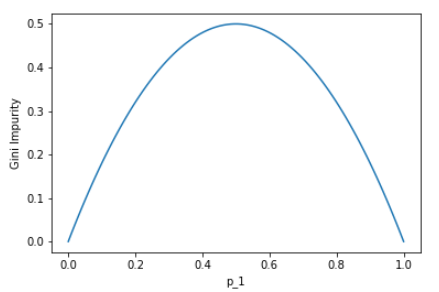

Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision tree depth: 11
Test set accuracy: 0.9884393063583815


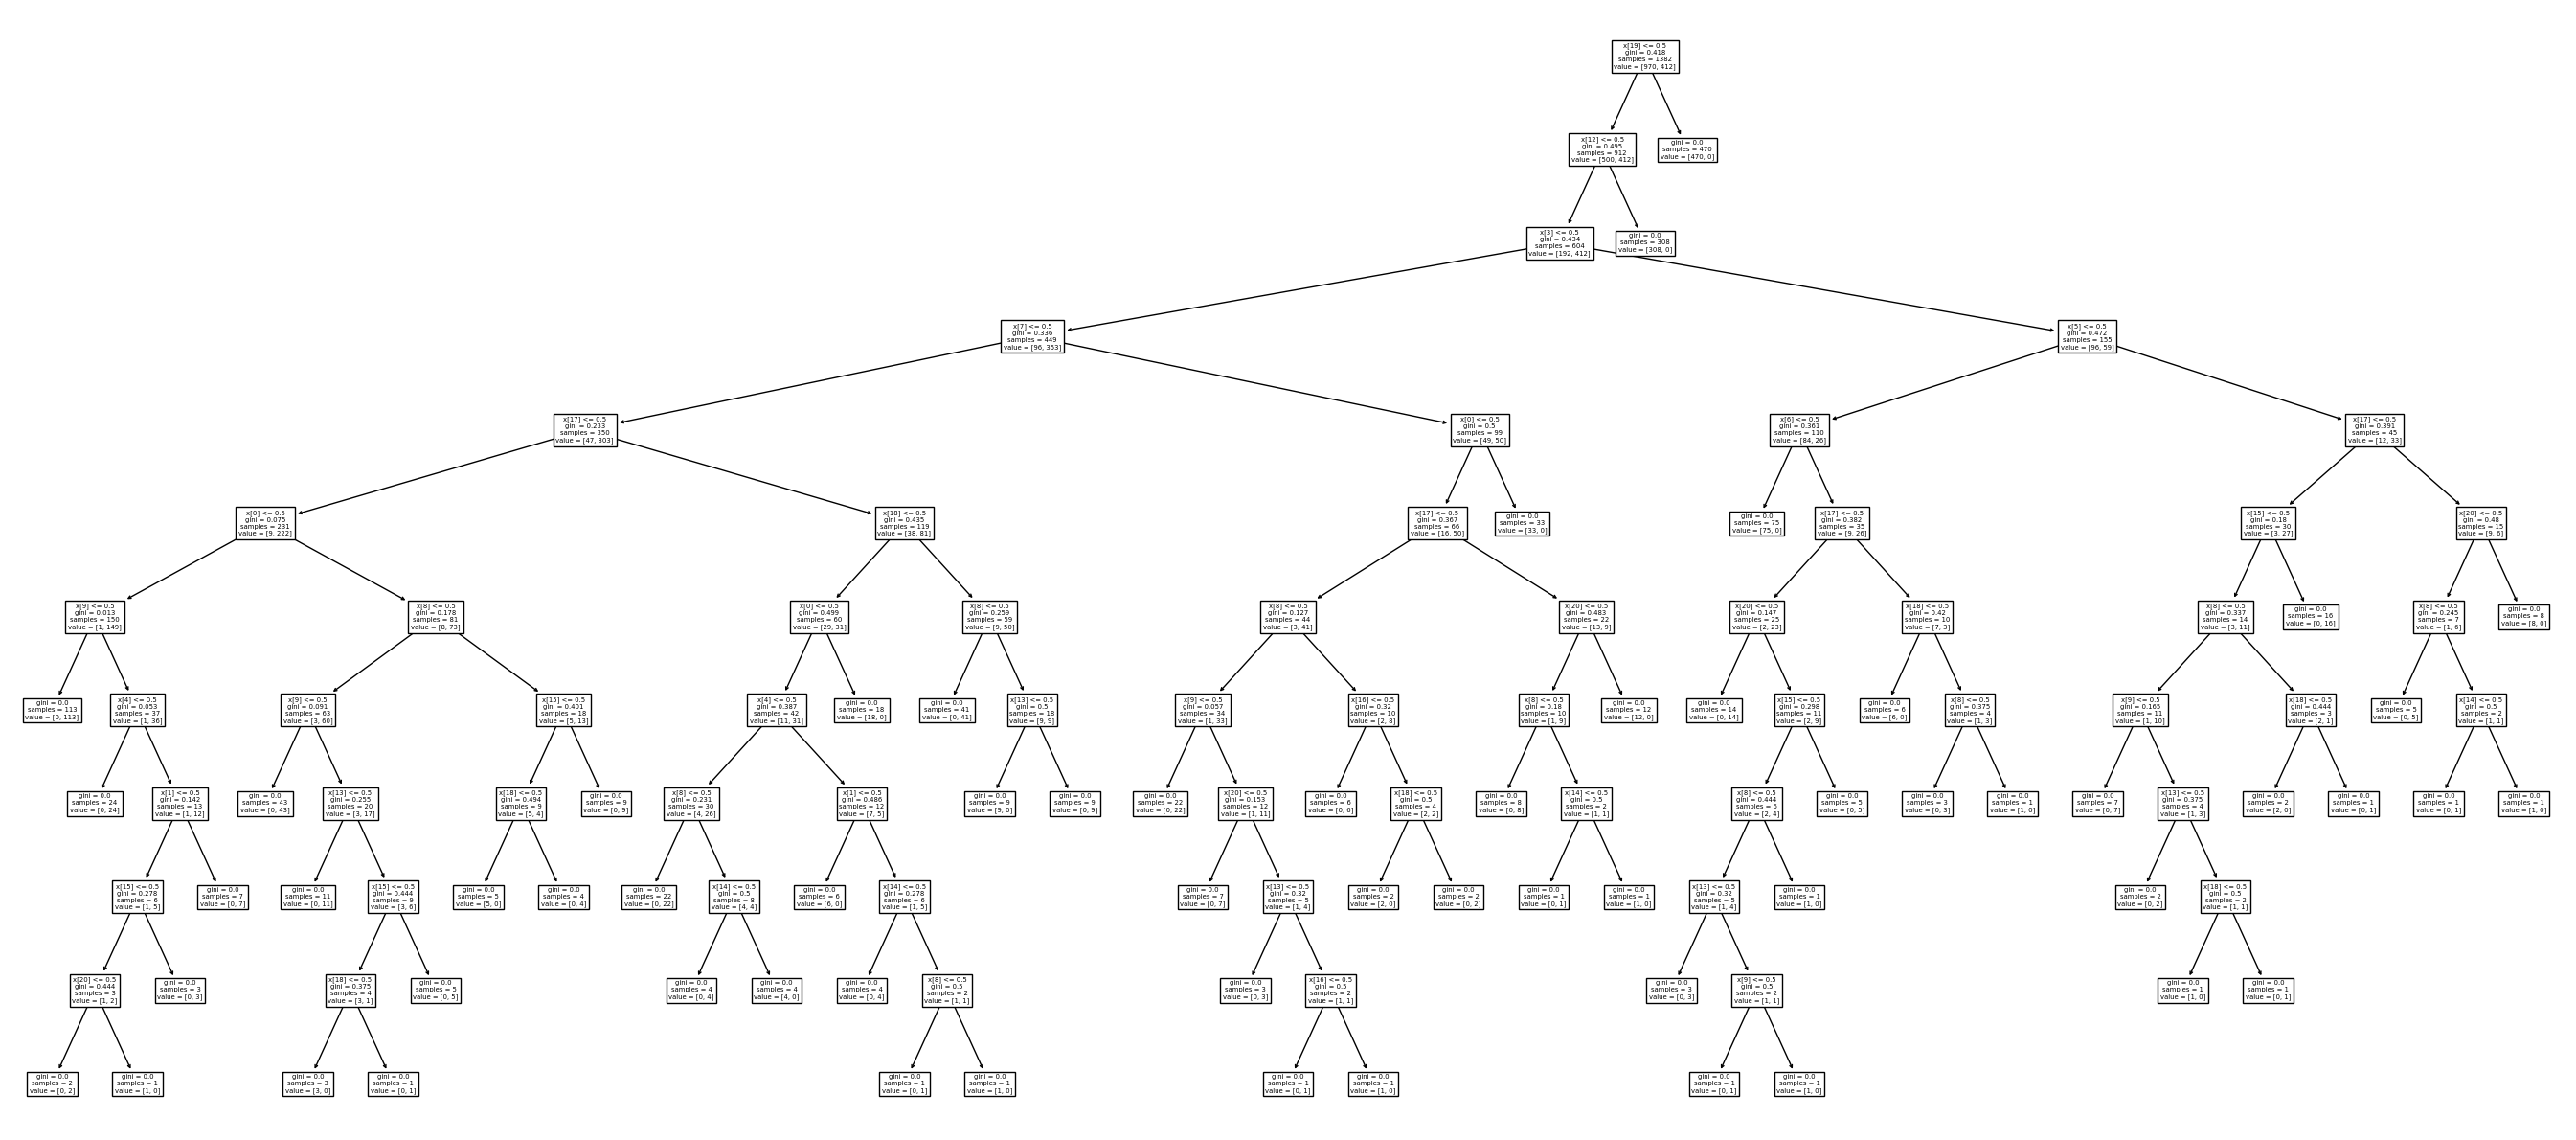

|--- feature_19 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- feature_15 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   | 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 1. Create a decision tree and print the parameters
dtree = DecisionTreeClassifier()
print(f'Decision Tree parameters: {dtree.get_params()}')

## 2. Fit decision tree on training set and print the depth of the tree
dtree.fit(x_train, y_train)
print(f'Decision tree depth: {dtree.get_depth()}')

## 3. Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)
print(f'Test set accuracy: {dtree.score(x_test, y_test)}') # or accuracy_score(y_test, y_pred)

## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(dtree)
plt.tight_layout()
plt.show()

## Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree))

## Deicsions tree pros and cons

Advantages

- easy to understand, fully explainable, and have a natural way to visualize the decision making process
- often little modification needs to be made to the data prior to modeling (such as scaling, normalization, removing outliers)

Disadvantages

- our trees aren’t always globally optimal. This means that there might be a better tree out there somewhere that produces better results
- Our current strategy of creating trees is greedy. We assume that the best way to create a tree is to find the feature that will result in the largest information gain right now and split on that feature. We never consider the ramifications of that split further down the tree. It’s possible that if we split on a suboptimal feature right now, we would find even better splits later on.
- Prone to overfit data



In [2]:
import pandas as pd
df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

As a first step, we will create a binary class (1=admission likely , 0=admission unlikely) from the chance of admit – greater than 80% we will consider as likely. The remaining data columns will be used as predictors.

In [3]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']>=.8

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))

0.925
0.925


|--- cgpa <= 8.85
|   |--- class: False
|--- cgpa >  8.85
|   |--- gre_score <= 313.50
|   |   |--- class: False
|   |--- gre_score >  313.50
|   |   |--- class: True



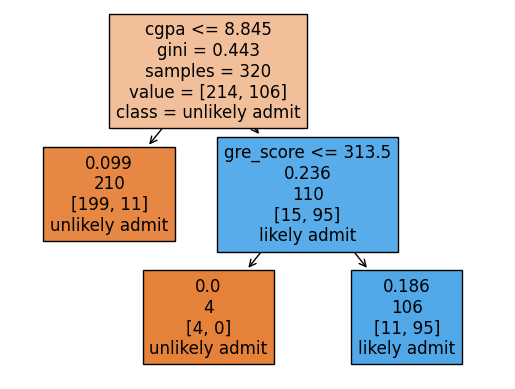

In [5]:
tree.plot_tree(dt, feature_names = x_train.columns,  
               max_depth=3, class_names = ['unlikely admit', 'likely admit'],
               label='root', filled=True)
print(tree.export_text(dt, feature_names = X.columns.tolist()))

## Decision trees for regression

decision trees can be used for both classification and regression tasks.

The fundamental difference is that for classification, splits are based on Gini impurity error calculations whereas for regression, Mean Squared Error minimization is used.

Tree traversal based on information gain and evaluation works pretty much the same way for both tasks.

Decision tree regressors differ from other regressors in that all output values may not be possible and it depends on the depth of the tree.

In [6]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))

0.5230242793515552


The syntax is identical as the decision tree classifier, except the target, y, must be real-valued and the model used must be DecisionTreeRegressor(). As far as the model hyperparameters go, almost all are the same, except for the split criterion. The split criterion now needs be suitable for a regression task – the default for regression is Mean Squared Error (or MSE).

[0.53283333 0.6976     0.81618182 0.92781818]


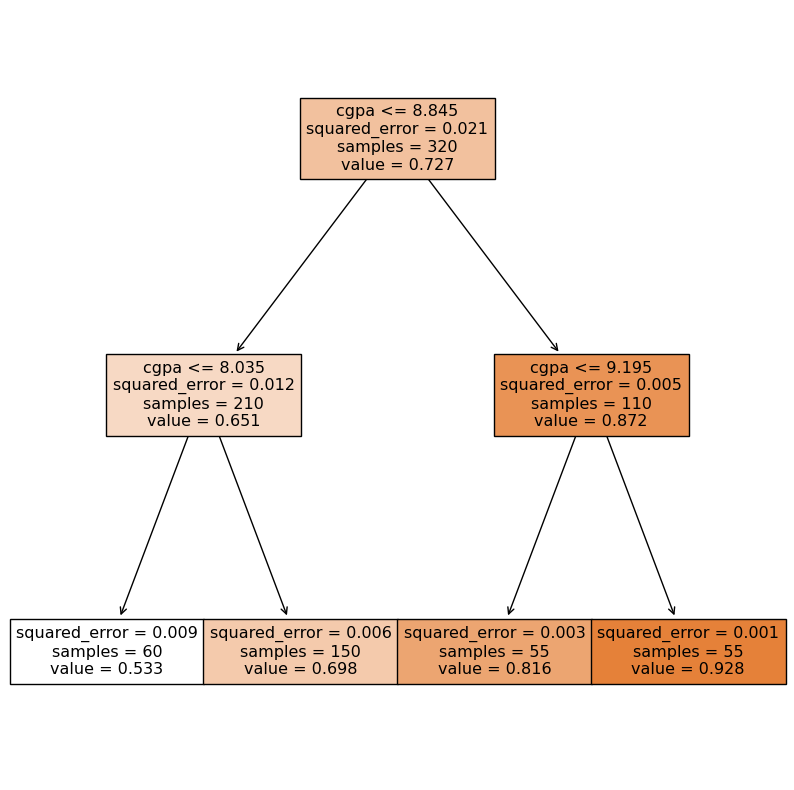

In [9]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, feature_names = x_train.columns,  
               max_depth=2, filled=True);

print(np.unique(dt.predict(x_train)))

Unlike the classification problem, there are no longer classes to split the tree by. Instead, at each level, the value is the average of all samples that fit the logical criteria. In terms of evaluating the split, the default method is MSE (mean squared error)

the process will continue until there is no increase in information gain by splitting. Now that the tree has been built, evaluation occurs in pretty much the same way. Any sample traverses through the tree until it reaches a leaf node and is then assigned the average value of the samples in leaf.